In [163]:
#Let us begin by importing necessary libraries.
from qiskit import Aer
from qiskit.algorithms import VQE, QAOA, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import *
from qiskit.circuit.library import TwoLocal
from qiskit.algorithms import QAOA
from qiskit.algorithms.optimizers import COBYLA
from qiskit.utils import QuantumInstance
from qiskit.utils import algorithm_globals
from qiskit_finance import QiskitFinanceError
from qiskit_finance.applications.optimization import PortfolioOptimization
from qiskit_finance.data_providers import *
from qiskit_optimization.algorithms import MinimumEigenOptimizer 
from qiskit_optimization.applications import OptimizationApplication
from qiskit_optimization.converters import QuadraticProgramToQubo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import warnings
from sympy.utilities.exceptions import SymPyDeprecationWarning
warnings.simplefilter("ignore", SymPyDeprecationWarning)

In [164]:
# Set parameters for assets and risk factor
num_assets = 4     # set number of assets to 4
q = 0.5                   # set risk factor to 0.5
budget = num_assets//2           # set budget as defined in the problem
seed = 132     #set random seed

# Generate time series data
stocks = [("STOCK%s" % i) for i in range(num_assets)]
data = RandomDataProvider(tickers=stocks,
                 start=datetime.datetime(1955,11,5),   
                 end=datetime.datetime(1985,10,26),  
                 seed=seed)
data.run()

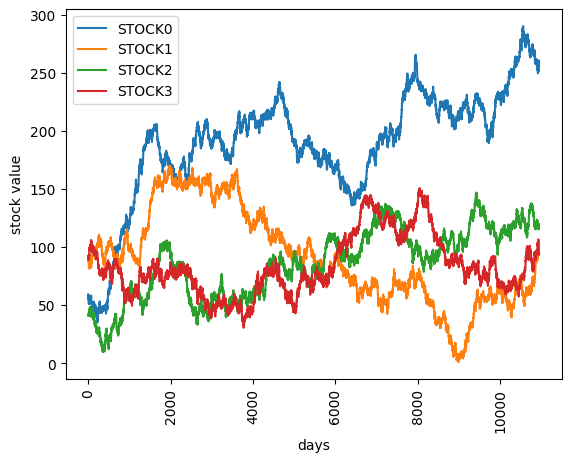

In [165]:
# Let's plot our finanical data
for (cnt, s) in enumerate(data._tickers):
    plt.plot(data._data[cnt], label=s)
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('days')
plt.ylabel('stock value')
plt.show()

[1.59702144e-04 4.76518943e-04 2.39123234e-04 9.85029012e-05]
[[ 4.88319903e-05 -1.07868619e-06 -2.12961489e-06  7.06600109e-07]
 [-1.07868619e-06  9.97360142e-04  3.51594354e-06  3.68715793e-07]
 [-2.12961489e-06  3.51594354e-06  2.87365468e-04  3.20819120e-06]
 [ 7.06600109e-07  3.68715793e-07  3.20819120e-06  1.92316728e-04]]


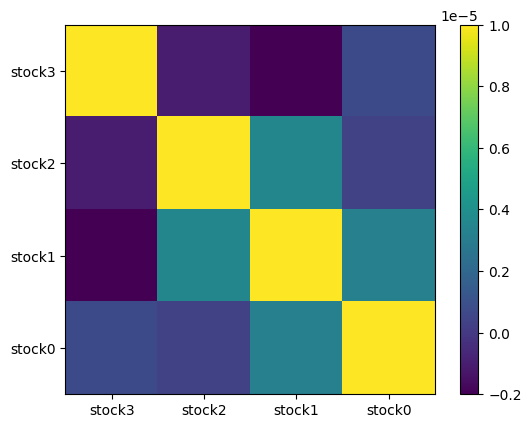

In [166]:
#Let's calculate the expected return for our problem data

mu = data.get_period_return_mean_vector()   # Returns a vector containing the mean value of each asset's expected return.

print(mu)

# Let's plot our covariance matrix Σ（sigma）
sigma = data.get_period_return_covariance_matrix() #Returns the covariance matrix of the four assets
print(sigma)
fig, ax = plt.subplots(1,1)
im = plt.imshow(sigma, extent=[-1,1,-1,1])
x_label_list = ['stock3', 'stock2', 'stock1', 'stock0']
y_label_list = ['stock3', 'stock2', 'stock1', 'stock0']
ax.set_xticks([-0.75,-0.25,0.25,0.75])
ax.set_yticks([0.75,0.25,-0.25,-0.75])
ax.set_xticklabels(x_label_list)
ax.set_yticklabels(y_label_list)
plt.colorbar()
plt.clim(-0.000002, 0.00001)
plt.show()

In [167]:
##############################
# Provide your code here

portfolio = PortfolioOptimization(expected_returns=mu, covariances=sigma, risk_factor=q, budget=budget)
qp = portfolio.to_quadratic_program()

##############################
print(qp)

minimize 2.4415995135490727e-05*x_0^2 - 1.0786861899637606e-06*x_0*x_1 - 2.1296148915846122e-06*x_0*x_2 + 7.066001088966945e-07*x_0*x_3 + 0.00049868007084229*x_1^2 + 3.5159435419629015e-06*x_1*x_2 + 3.6871579302951345e-07*x_1*x_3 + 0.0001436827339584932*x_2^2 + 3.2081912029440255e-06*x_2*x_3 + 9.615836394350566e-05*x_3^2 - 0.00015970214434540012*x_0 - 0.00047651894322521895*x_1 - 0.00023912323435150106*x_2 - 9.850290123158255e-05*x_3 (4 variables, 1 constraints, 'Portfolio optimization')


In [171]:
optimizer = SLSQP(maxiter=1000)  
algorithm_globals.random_seed = 1234
backend = Aer.get_backend('statevector_simulator')


##############################
# Provide your code here

vqe = VQE(optimizer=optimizer, quantum_instance=QuantumInstance(backend))


##############################

vqe_meo = MinimumEigenOptimizer(vqe)  #please do not change this code

result = vqe_meo.solve(qp)  #please do not change this code

print(result)    #please do not change this code

fval=-0.00023285626449450188, x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, status=SUCCESS
